<a href="https://www.kaggle.com/code/egyfirst/when-less-means-more?scriptVersionId=127741186" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import time
import os.path

import warnings
warnings.filterwarnings('ignore')

# When simple means more powerful

Most calssic clustering algorithms fail in detecting complex where clusters are of different size, shape, density, and being exist in noisy data.

recently, a density-based algorithm named DenMune showed great ability in detecting complex shapes even in noisy data. it can detect number of clusters automatically, detect both pre-identified-noise and post-identified-noise automatically then remove them.

It can achieve accuracy reach 100% in most classic pattern problems, achieve 97% in MNIST dataset.

A great advantage of this algorithm is being single-parameter algorithm. All you need is to set number of k-nearest neighbor and the algorithm will care about the rest. Being Non-senstive to changes in k, make it  robust and stable.

keep in mind, the algorithm reduce any N-D dataset to only 2-D dataset initially, so it is a good benefit of this algorithm is being always to plot your data and explore it which make this algorithm a good candidate for data exploration.

Finally, the algorithm comes with neat package for visualizing data, validating it and analyze the whole clustering process.

# Install DenMune. Import it

In [2]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# then import it
from denmune import DenMune

     |████████████████████████████████| 9.2 MB 5.6 MB/s            
     |████████████████████████████████| 41 kB 416 kB/s             


# Load data

In [3]:
# clone datasets from our repository datasets
if not os.path.exists('datasets'):
  !git clone https://github.com/egy1st/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 68 (delta 12), reused 63 (delta 10), pack-reused 0
Unpacking objects: 100% (68/68), 20.59 MiB | 6.22 MiB/s, done.


# Read data

there are four possible cases of data
- only train data without labels
- only labeld train data
- labeled train data in addition to test data without labels
- labeled train data in addition to labeled test data

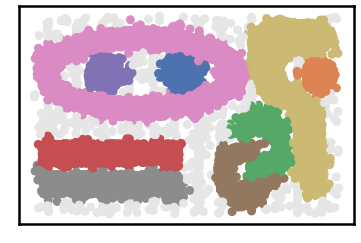

In [4]:
#=============================================
# First scenario: train data without labels 
# ============================================

data_path = 'datasets/denmune/chameleon/'  
dataset = "t7.10k.csv" 
data_file = data_path + dataset 

# train data without labels
X_train = pd.read_csv(data_file, sep=',', header=None)

knn = 39 # k-nearest neighbor, the only parameter required by the algorithm

dm = DenMune(train_data=X_train, k_nearest=knn)
labels, validity = dm.fit_predict(show_analyzer=False, show_noise=True)


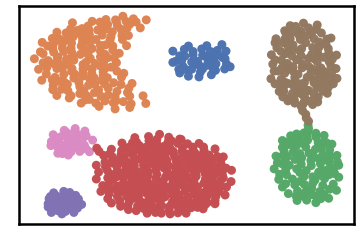

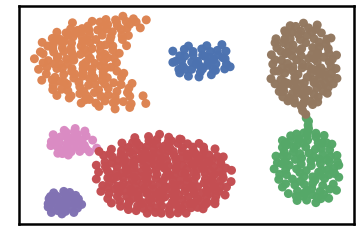

In [5]:
#=============================================
# Second scenario: train data with labels 
# ============================================

data_path = 'datasets/denmune/shapes/'  
dataset = "aggregation.csv"
data_file = data_path + dataset 

# train data with labels
X_train = pd.read_csv(data_file, sep=',', header=None)
y_train = X_train.iloc[:, -1]
X_train = X_train.drop(X_train.columns[-1], axis=1)  

knn = 6 # k-nearest neighbor, the only parameter required by the algorithm

dm = DenMune(train_data=X_train, train_truth= y_train, k_nearest=knn)
labels, validity = dm.fit_predict(show_analyzer=False, show_noise=True)



I am in One
Plotting dataset Groundtruth


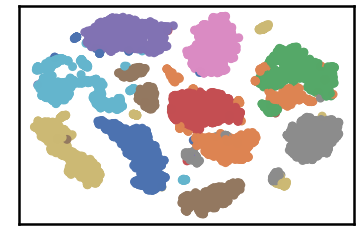

Plotting train data


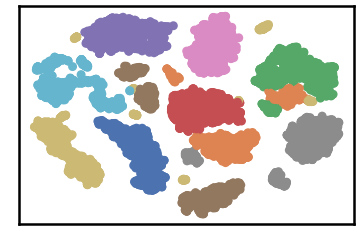

Validating train data
├── exec_time
│   ├── DenMune: 8.586
│   ├── NGT: 0.651
│   └── t_SNE: 54.325
├── n_clusters
│   ├── actual: 10
│   └── detected: 10
├── n_points
│   ├── dim: 16
│   ├── noise
│   │   ├── type-1: 0
│   │   └── type-2: 0
│   ├── plot_size: 7494
│   ├── size: 10992
│   ├── strong: 5904
│   └── weak
│       ├── all: 5088
│       ├── failed to merge: 0
│       └── succeeded to merge: 5088
└── validity
    └── train
        ├── ACC: 7259
        ├── AMI: 0.938
        ├── ARI: 0.933
        ├── F1: 0.968
        ├── NMI: 0.938
        ├── completeness: 0.939
        └── homogeneity: 0.938

Plotting test data


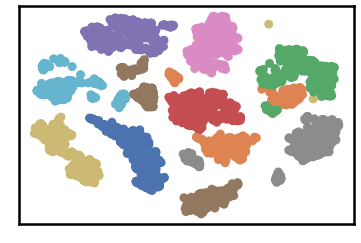

In [6]:
#=================================================================
# Third scenario: train data with labels in addition to test data
# ================================================================

data_path = 'datasets/denmune/pendigits/'  
file_2d = data_path + 'pendigits-2d.csv'

# train data with labels 
X_train = pd.read_csv(data_path + 'train.csv', sep=',', header=None)
y_train = X_train.iloc[:, -1]
X_train = X_train.drop(X_train.columns[-1], axis=1)

# test data without labels
X_test = pd.read_csv(data_path + 'test.csv', sep=',', header=None) 
X_test = X_test.drop(X_test.columns[-1], axis=1)

knn = 50 # k-nearest neighbor, the only parameter required by the algorithm

dm = DenMune(train_data=X_train, train_truth= y_train,
             test_data= X_test, 
             k_nearest=knn)
labels, validity = dm.fit_predict(show_analyzer=True, show_noise=True)

I am in One
Plotting dataset Groundtruth


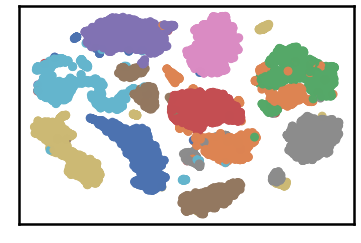

Plotting train data


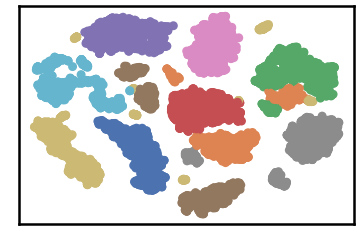

Validating train data
├── exec_time
│   ├── DenMune: 8.687
│   ├── NGT: 0.719
│   └── t_SNE: 53.082
├── n_clusters
│   ├── actual: 10
│   └── detected: 10
├── n_points
│   ├── dim: 16
│   ├── noise
│   │   ├── type-1: 0
│   │   └── type-2: 0
│   ├── plot_size: 7494
│   ├── size: 10992
│   ├── strong: 5904
│   └── weak
│       ├── all: 5088
│       ├── failed to merge: 0
│       └── succeeded to merge: 5088
└── validity
    └── train
        ├── ACC: 7259
        ├── AMI: 0.938
        ├── ARI: 0.933
        ├── F1: 0.968
        ├── NMI: 0.938
        ├── completeness: 0.939
        └── homogeneity: 0.938

Validating test data
├── ACC: 3445
├── AMI: 0.967
├── ARI: 0.967
├── F1: 0.985
├── NMI: 0.967
├── completeness: 0.967
└── homogeneity: 0.967

Plotting test data


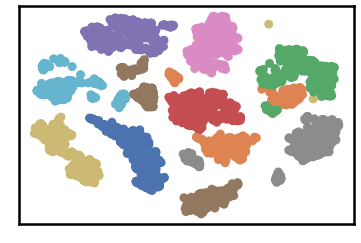

In [7]:
#=========================================================================
# Fourth scenario: train data with labels in addition to labeled test data 
# ========================================================================

data_path = 'datasets/denmune/pendigits/'  
file_2d = data_path + 'pendigits-2d.csv'

# train data with labels
X_train = pd.read_csv(data_path + 'train.csv', sep=',', header=None)
y_train = X_train.iloc[:, -1]
X_train = X_train.drop(X_train.columns[-1], axis=1) 

# test data with labels
X_test = pd.read_csv(data_path + 'test.csv', sep=',', header=None) 
y_test = X_test.iloc[:, -1]
X_test = X_test.drop(X_test.columns[-1], axis=1)

knn = 50 # k-nearest neighbor, the only parameter required by the algorithm

dm = DenMune(train_data=X_train, train_truth= y_train,
             test_data= X_test, test_truth=y_test, 
             k_nearest=knn)
labels, validity = dm.fit_predict(show_plots=True, show_analyzer=True, show_noise=True)

# Validate your prediction

The algorithm comes with built-in validity-indexes; thus no additional steps required from your side to validate test data. It offers five well known validity indexes:
- Accuracy
- F1- score
- NMI index (Normalized mutual information)
- AMI index (Adjusted mutual information )
- ARI (Adjusted rand index)

labels, validity = dm.fit_predict()

The function fit_predict will return both predicted labels and validity indexex


In [8]:
validity

{'train': {'ACC': 7259,
  'F1': 0.9684558870192504,
  'NMI': 0.9383407757976636,
  'AMI': 0.9381952327022363,
  'ARI': 0.9330201778731013,
  'homogeneity': 0.9381122309289289,
  'completeness': 0.9385694320506943},
 'test': {'ACC': 3445,
  'F1': 0.9848424082837747,
  'NMI': 0.9669330297726961,
  'AMI': 0.9667648578372234,
  'ARI': 0.9666585645339041,
  'homogeneity': 0.9668949890621269,
  'completeness': 0.9669710734766672}}

# Dive into results

The algorithm provide an intutive tool called show_analyzer, once called it will provide you with in-depth analysis on how your clustering results perform

In [9]:
dm.analyzer

{'n_points': {'size': 10992,
  'noise': {'type-1': 0, 'type-2': 0},
  'weak': {'all': 5088, 'succeeded to merge': 5088, 'failed to merge': 0},
  'dim': 16,
  'strong': 5904,
  'plot_size': 3498},
 'exec_time': {'t_SNE': 53.08205032348633,
  'NGT': 0.7186870574951172,
  'DenMune': 8.68708324432373},
 'n_clusters': {'actual': 10, 'detected': 10},
 'validity': {'train': {'ACC': 7259,
   'F1': 0.9684558870192504,
   'NMI': 0.9383407757976636,
   'AMI': 0.9381952327022363,
   'ARI': 0.9330201778731013,
   'homogeneity': 0.9381122309289289,
   'completeness': 0.9385694320506943},
  'test': {'ACC': 3445,
   'F1': 0.9848424082837747,
   'NMI': 0.9669330297726961,
   'AMI': 0.9667648578372234,
   'ARI': 0.9666585645339041,
   'homogeneity': 0.9668949890621269,
   'completeness': 0.9669710734766672}}}

# Reveal the propagation

one of the top performing feature in this algorithm is enabling you to watch how your clusters propagate to construct the final output clusters.

just  use the parameter 'prop_step' as in the following example

Propagation at iteration: 5000


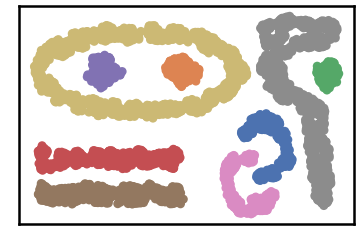

In [10]:
dataset = "t7.10k" #
data_path = 'datasets/denmune/chameleon/' 

# train file
data_file = data_path + dataset +'.csv'
X_train = pd.read_csv(data_file, sep=',', header=None)


from itertools import chain

# Denmune's Paramaters
knn = 39 # number of k-nearest neighbor, the only parameter required by the algorithm

# create list of differnt snapshots of the propagation
snapshots = chain(range(2,5), range(5,50,10), range(50, 100, 25), range(100,500,100), range(500,2000, 250), range(1000,5500, 500))

from IPython.display import clear_output
for snapshot in snapshots:
    print ("itration", snapshot )
    clear_output(wait=True)
    dm = DenMune(train_data=X_train, k_nearest=knn, rgn_tsne=False, prop_step=snapshot)
    labels, validity = dm.fit_predict(show_analyzer=False, show_noise=False)    

The algorithm save an image of each snapshot in a folder named propagation, so you can simply unity them into an animated GIF file as in the followin example. An image called 'propagation.gif' is created for you.

In [11]:
from PIL import Image

# collect immages for each snapshot automatically by the algorithm in a folder named propagation
images = []
prop_folder = 'propagation'
img_files = os.listdir(prop_folder)
img_files = [os.path.join(prop_folder, f) for f in img_files]
sorted_files = sorted (img_files, key=os.path.getmtime) 
for filename in sorted_files:
  im = Image.open(filename)
  images.append(im)

# create annimated gif to show evolution of the propagation
images[0].save('propagation.gif', save_all=True, append_images=images[1:], optimize=False, duration=800, loop=1)

# Am I sensitive to K

Although the algorithm is only single-parameter, accract is not sensitive to changes in that parameter, k. You may guess that from the following chart yourself. This is of greate benfit for you as a data exploration. You can simply explore the dataset using an arbitrary k.


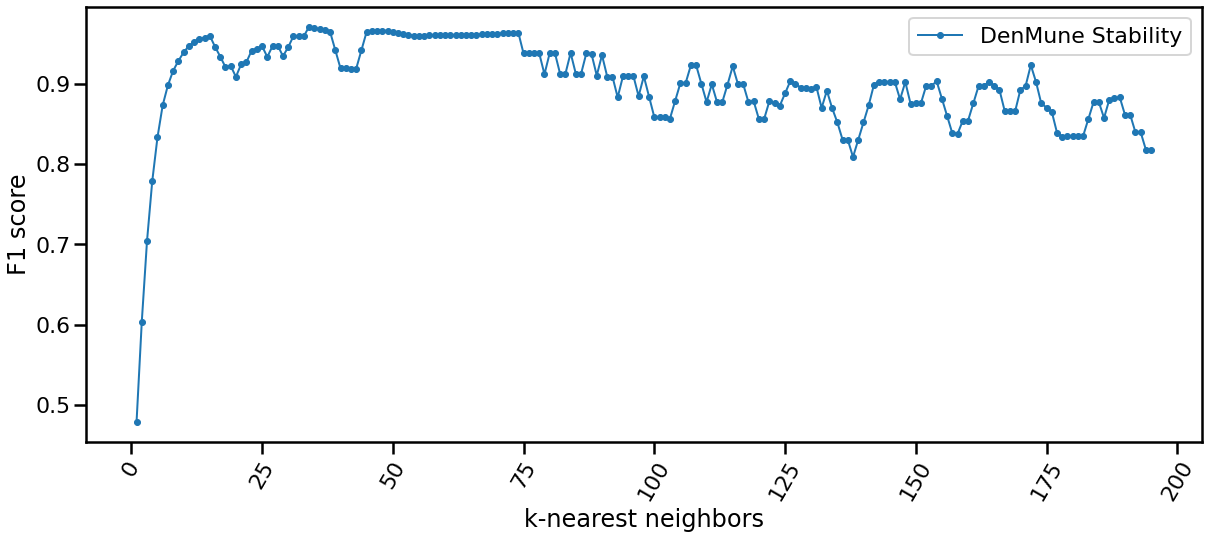

# Give it a try

The algorithm is an  
[open-source repository at Github](https://github.com/egy1st/denmune-clustering-algorithm)

[![PyPI Version](https://img.shields.io/pypi/v/denmune.svg)]( https://pypi.org/project/denmune/)
[![Launch notebook examples in Binder](https://static.mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/egy1st/denmune-clustering-algorithm/HEAD)
[![read the documentation](https://img.shields.io/badge/read_the-docs-orange)](https://docs.zerobytes.one/denmune/)
[![Launch notebook examples in Colaboratory, Google Research]( https://colab.research.google.com/assets/colab-badge.svg)](#colab)
[![Launch notebook examples in Kaggle, the workspace where data scientist meet](https://kaggle.com/static/images/open-in-kaggle.svg)](https://www.kaggle.com/egyfirst/denmune-clustering-iris-dataset?scriptVersionId=84775816)
[![Elsevier, journal's article publisher ](https://img.shields.io/badge/elsevier-published-orange)](https://www.sciencedirect.com/science/article/abs/pii/S0031320320303927)
[![Research datasets at  Mendeley ](https://img.shields.io/badge/mendeley-data-bluegreen)](https://data.mendeley.com/datasets/b73cw5n43r/4)
[![BSD 3-Clause “New” or “Revised” License" ](https://img.shields.io/badge/license-BSD-green)](https://choosealicense.com/licenses/bsd-3-clause/)

